## *ESTUDO DIRIGIDO - CONTROLE E AUTOMAÇÃO 2025.2*
### Livro texto da disciplina: Sistemas de Controle Modernos - 8a Edição


Aluno: João Marcos Amorim de Almeida


# Capítulo 5: O desempenho de sistemas de controle com reatroação

Este capítulo aborda as especificações de desempenho no domínio do tempo, como ultrapassagem percentual, tempo de acomodação, tempo de pico, tempo de subida e erro de estado estacionário. Também explora a relação entre o desempenho do sistema e a localização dos polos e zeros no plano s da função de transferência.

## Introdução
A capacidade de ajustar o desempenho transitório e permanente é uma vantagem dos sistemas de controle com retroação. Para projetar um sistema, é necessário definir métricas de desempenho e ajustar os parâmetros para alcançar a resposta desejada. A resposta transitória refere-se ao comportamento inicial do sistema, enquanto a resposta em regime permanente ocorre após um longo período. As especificações de projeto incluem índices temporais e a precisão em regime permanente, que indicam a qualidade do sistema.

## Sinais de Entrada para Teste
Como o desempenho dos sistemas de controle é avaliado no domínio do tempo, sinais de teste são utilizados para medir sua resposta. Os mais comuns são: degrau, rampa, parábola e impulso unitário. Esses sinais ajudam a avaliar a estabilidade e o desempenho do sistema.

## Índices de Desempenho
A teoria de controle moderno exige que o desempenho do sistema seja especificado quantitativamente. Um índice de desempenho é uma medida que reflete as especificações críticas do sistema. Um sistema é considerado ótimo quando seus parâmetros são ajustados para minimizar (ou maximizar) esse índice. Para ser útil, o índice deve ser sempre positivo ou nulo, permitindo a comparação e otimização do desempenho.


Simulações e Exemplos - Capítulo 5

In [2]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

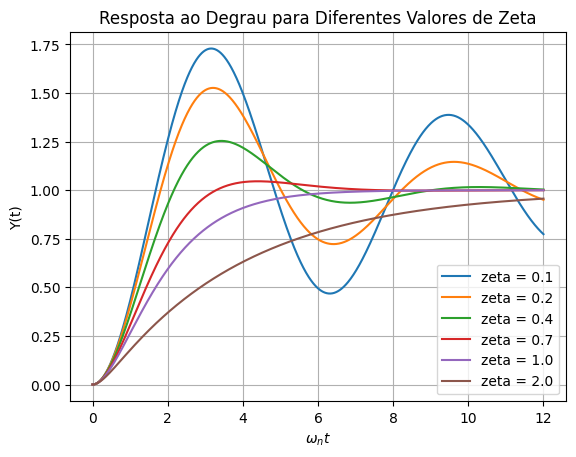

In [3]:
# Tempo de simulação
t = np.linspace(0, 12, 1000)  # Equivalente ao [0:0.01:12] em MATLAB

# Numerador da função de transferência
num = [1]

# Denominadores para diferentes valores de zeta
zeta_values = [0.1, 0.2, 0.4, 0.7, 1.0, 2.0]
den1 = [1, 2 * zeta_values[0], 1]
den2 = [1, 2 * zeta_values[1], 1]
den3 = [1, 2 * zeta_values[2], 1]
den4 = [1, 2 * zeta_values[3], 1]
den5 = [1, 2 * zeta_values[4], 1]
den6 = [1, 2 * zeta_values[5], 1]

# Calculando as respostas ao degrau
t, y1 = ctl.step_response(ctl.tf(num, den1), t)
t, y2 = ctl.step_response(ctl.tf(num, den2), t)
t, y3 = ctl.step_response(ctl.tf(num, den3), t)
t, y4 = ctl.step_response(ctl.tf(num, den4), t)
t, y5 = ctl.step_response(ctl.tf(num, den5), t)
t, y6 = ctl.step_response(ctl.tf(num, den6), t)

# Plotando as respostas
plt.plot(t, y1, label='zeta = 0.1')
plt.plot(t, y2, label='zeta = 0.2')
plt.plot(t, y3, label='zeta = 0.4')
plt.plot(t, y4, label='zeta = 0.7')
plt.plot(t, y5, label='zeta = 1.0')
plt.plot(t, y6, label='zeta = 2.0')

plt.xlabel(r'$\omega_n t$')
plt.ylabel('Y(t)')
plt.title('Resposta ao Degrau para Diferentes Valores de Zeta')
plt.grid(True)
plt.legend()
plt.show()

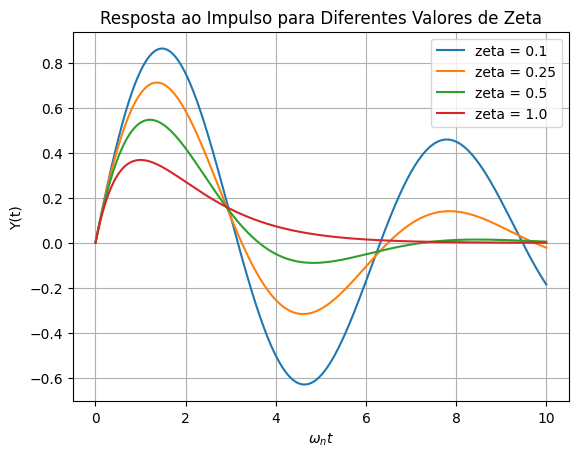

In [4]:
# Tempo de simulação
t = np.linspace(0, 10, 1000)  # Equivalente ao [0:0.01:10] em MATLAB

# Numerador da função de transferência
num = [1]

# Denominadores para diferentes valores de zeta
zeta_values = [0.1, 0.25, 0.5, 1.0]
den1 = [1, 2 * zeta_values[0], 1]
den2 = [1, 2 * zeta_values[1], 1]
den3 = [1, 2 * zeta_values[2], 1]
den4 = [1, 2 * zeta_values[3], 1]

# Calculando as respostas ao impulso
t, y1 = ctl.impulse_response(ctl.tf(num, den1), t)
t, y2 = ctl.impulse_response(ctl.tf(num, den2), t)
t, y3 = ctl.impulse_response(ctl.tf(num, den3), t)
t, y4 = ctl.impulse_response(ctl.tf(num, den4), t)

# Plotando as respostas ao impulso
plt.plot(t, y1, label='zeta = 0.1')
plt.plot(t, y2, label='zeta = 0.25')
plt.plot(t, y3, label='zeta = 0.5')
plt.plot(t, y4, label='zeta = 1.0')

plt.xlabel(r'$\omega_n t$')
plt.ylabel('Y(t)')
plt.title('Resposta ao Impulso para Diferentes Valores de Zeta')
plt.grid(True)
plt.legend()
plt.show()

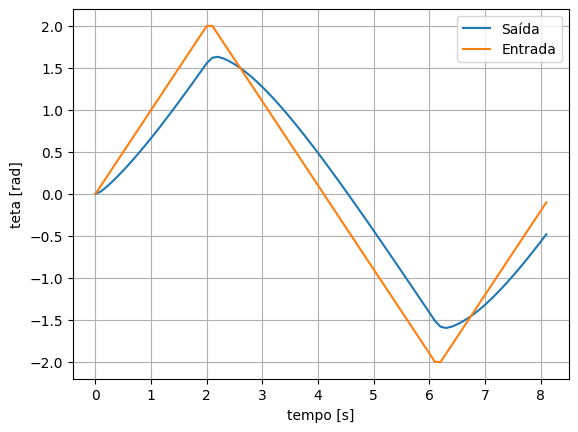

In [5]:
# Numerador e denominador da função de transferência de malha aberta
numg = [10, 20]
deng = [1, 10, 0]

# Fechamento da malha utilizando a função `feedback`
system = ctl.feedback(ctl.tf(numg, deng))

# Vetor de tempo
t = np.arange(0, 8.2, 0.1)  # Equivalente ao [0:0.1:8.2] em MATLAB

# Definição dos sinais de entrada `u`
v1 = np.arange(0, 2.1, 0.1)  # Equivalente ao [0:0.1:2]
v2 = np.arange(2, -2.1, -0.1)  # Equivalente ao [2:-0.1:-2]
v3 = np.arange(-2, 0.1, 0.1)  # Equivalente ao [-2:0.1:0]

# Concatenando os sinais de entrada em um único vetor
u = np.concatenate((v1, v2, v3))

# Certificando-se de que `u` tenha o mesmo comprimento que `t`
u = u[:len(t)]

# Simulação da resposta ao sinal de entrada utilizando `lsim`
t, y = ctl.forced_response(system, T=t, U=u)

# Plotando a resposta e o sinal de entrada
plt.plot(t, y, label='Saída')
plt.plot(t, u, label='Entrada')

plt.xlabel('tempo [s]')
plt.ylabel('teta [rad]')
plt.grid(True)
plt.legend()
plt.show()


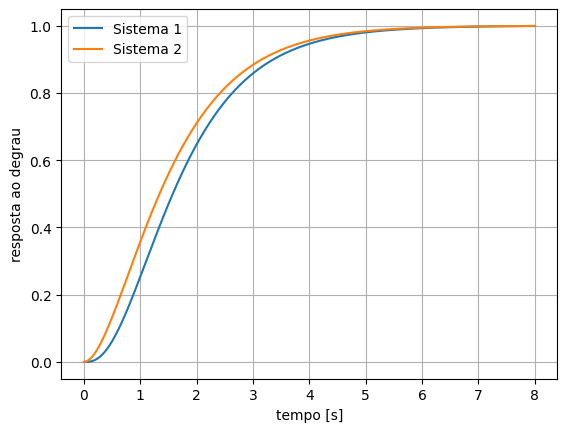

In [6]:
# Definindo as funções de transferência
num1 = [6]
den1 = [1, 6, 11, 6]
num2 = [1.6]
den2 = [1, 2.584, 1.6]

# Vetor de tempo equivalente a [0:0.01:8] no MATLAB
t = np.linspace(0, 8, 801)  # 801 pontos para uma resolução de 0.01 segundos

# Resposta ao degrau para os dois sistemas
t, y1 = ctl.step_response(ctl.tf(num1, den1), T=t)
t, y2 = ctl.step_response(ctl.tf(num2, den2), T=t)

# Plotando as respostas
plt.plot(t, y1, label='Sistema 1')
plt.plot(t, y2, label='Sistema 2')
plt.grid(True)
plt.xlabel('tempo [s]')
plt.ylabel('resposta ao degrau')
plt.legend()
plt.show()

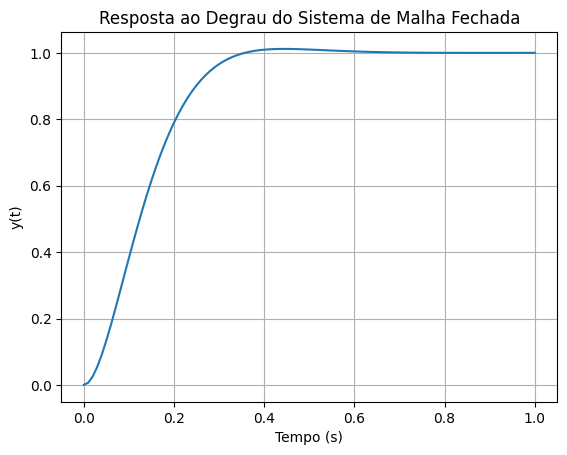

In [7]:
# Parâmetro Ka
Ka = 30

# Vetor de tempo equivalente a [0:0.01:1] em MATLAB
t = np.arange(0, 1.01, 0.01)  # 0.01 é o intervalo de amostragem

# Numeradores e denominadores das funções de transferência
nc = [Ka * 5]
dc = [1]
ng = [1]
dg = [1, 20, 0]

# Criação das funções de transferência
G_c = ctl.tf(nc, dc)  # Função de transferência do controlador
G_g = ctl.tf(ng, dg)  # Função de transferência do sistema

# Combinação em série das funções de transferência
G_open_loop = ctl.series(G_c, G_g)

# Fechamento da malha
G_closed_loop = ctl.feedback(G_open_loop)

# Resposta ao degrau do sistema de malha fechada
t, y = ctl.step_response(G_closed_loop, T=t)

# Plotando a resposta
plt.plot(t, y)
plt.grid(True)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau do Sistema de Malha Fechada')
plt.show()

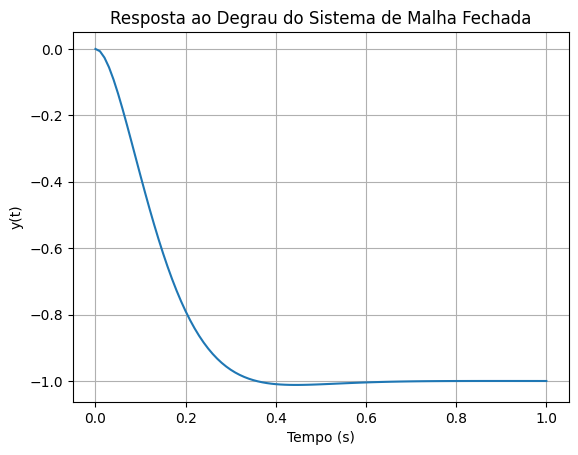

In [8]:
# Parâmetro Ka
Ka = 30

# Vetor de tempo equivalente a [0:0.01:1] em MATLAB
t = np.arange(0, 1.01, 0.01)  # 0.01 é o intervalo de amostragem

# Numeradores e denominadores das funções de transferência
nc = [Ka * 5]
dc = [1]
ng = [1]
dg = [1, 20, 0]

# Criação das funções de transferência
G_c = ctl.tf(nc, dc)  # Função de transferência do controlador
G_g = ctl.tf(ng, dg)  # Função de transferência do sistema

# Fechamento da malha com retroação
G_open_loop = ctl.series(G_c, G_g)
G_closed_loop = ctl.feedback(G_open_loop)

# Inversão do sinal da função de transferência
num, den = ctl.tfdata(G_closed_loop)
num = -np.squeeze(num)  # Inversão do sinal do numerador

# Criação da nova função de transferência para resposta ao degrau
G_cloop = ctl.tf(num, den)

# Resposta ao degrau do sistema de malha fechada
t, y = ctl.step_response(G_cloop, T=t)

# Plotando a resposta
plt.plot(t, y)
plt.grid(True)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau do Sistema de Malha Fechada')
plt.show()